Following Mandal and Huo in their J. Phys. Chem. Lett. paper [here](https://pubs.acs.org/doi/abs/10.1021/acs.jpclett.9b01599), we will define the polariton Hamiltonian as follows:

\begin{equation}
\hat{H}_{pl} = \hat{H}_{el} + \hat{H}_p + \hat{H}_{el,p}
\end{equation}

where $\hat{H}_e$ denotes the electronic Hamiltonian:
\begin{equation}
\hat{H}_{el} = E_g(R) \: \hat{a}^{\dagger}_g \hat{a}_g + E_e(R) \: \hat{a}^{\dagger}_e \hat{a}_e,
\end{equation}
where $E_g(R)$ ($E_e(R)$) denotes the ground- (excited-) state electronic energy at nuclear coordinate $R$, and
$\hat{a}^{\dagger}_p$ ($\hat{a}_p$) are the creation (annihilation) operators for electronic state $p$.
The following matrix elements are equal to 1 using these operators and the basis states spanning $|g\rangle , |e\rangle$.
\begin{align}
\langle g | \hat{a}^{\dagger}_g \hat{a}_g | g \rangle = 1 \\
\langle e | \hat{a}^{\dagger}_e \hat{a}_e | e \rangle = 1 \\
\langle g | \hat{a}^{\dagger}_g \hat{a}_e | e \rangle = 1 \\
\langle e | \hat{a}^{\dagger}_e \hat{a}_g | g \rangle = 1; 
\end{align}
all other are zero.


The photon Hamiltonian is 
\begin{equation}
\hat{H}_p = \hbar \omega_c \left(\hat{b}^{\dagger} \hat{b} + \frac{1}{2}  \right),
\end{equation}
where $\hat{b}^{\dagger}$ and $\hat{b}$ denote the raising/lowering operators for the photon states, respectively.
The raising operator has the general effect on the basis states $|n\rangle$,
\begin{equation}
\hat{b}^{\dagger} |n\rangle = \sqrt{n+1} |n+1\rangle,
\end{equation}
while the lowering operator has the general effect
\begin{equation}
\hat{b} |n\rangle = \sqrt{n} |n-1\rangle;
\end{equation}
importantly, $\hat{b} |0\rangle  = 0$.  Both the photon and the electronic basis states form an orthonormal 
set, such that
\begin{equation}
\langle i | j \rangle = \delta_{ij}.
\end{equation}

Following Eq. S2 from Mandal and Huo, we compute $E_g(R)$ and $E_e(R)$ using the following code (see S2 in [this document](https://pubs.acs.org/doi/suppl/10.1021/acs.jpclett.9b01599/suppl_file/jz9b01599_si_001.pdf) for explicit equations):

In [1]:
import numpy as np
from numpy import linalg as LA
import math
from matplotlib import pyplot as plt

### Function to return the ground and excited-state electronic energy as a function of
### the nuclear coordinate $R$
def E_of_R(R):
    Ai = np.array([0.049244, 0.010657, 0.428129, 0.373005])
    Bi = np.array([0.18, 0.18, 0.18, 0.147])
    Ri = np.array([-0.75, 0.85, -1.15, 1.25])
    Di = np.array([0.073, 0.514])
    
    v = Ai + Bi*(R - Ri)**2
    
    Eg = 0.5*(v[0] + v[1]) - np.sqrt(Di[0]**2 + 0.25 * (v[0] - v[1])**2)
    Ee = 0.5*(v[2] + v[3]) - np.sqrt(Di[1]**2 + 0.25 * (v[2] - v[3])**2)
    return [Eg, Ee]
    

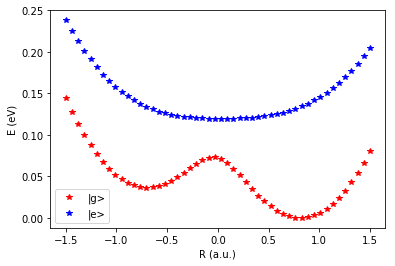

In [15]:
### Code to run E_of_R function for a variety of values of R between -1.5 and 1.5 atomic units
### and plot the energy in electron volts for the ground- and excited-state surface, 
### giving the plot from Figure 2 of Mandal and Huo's paper
rlist = np.linspace(-1.5, 1.5, 50)

E_ground = []
E_excite = []
for r in rlist:
    PES = E_of_R(r)
    E_ground.append(PES[0])
    E_excite.append(PES[1])
    
plt.plot(rlist, E_ground, 'r*', label='|g>')
plt.plot(rlist, E_excite, 'b*', label='|e>')
plt.xlabel("R (a.u.)")
plt.ylabel("E (eV)")
plt.legend()
plt.show()

The energy as a function of $R$ on the electronic ground $|g\rangle$ and excited-state $|e\rangle$ are referred
to as potential energy surfaces, $E_g(R)$ and $E_e(R)$, respectively.  The forces experienced by the nuclei as a function of position when the molecule is purely in the electronic ground state is given by 
\begin{equation}
F_g(R) = -\frac{\partial E_g(R)}{\partial R} \equiv -\frac{\partial }{\partial R} \langle g |  \hat{H}_{el} | g \rangle,
\end{equation}
and similarly, when the molecule is purely in the electronic excited-state, the force is given by 
\begin{equation}
F_e(R) = -\frac{\partial E_e(R)}{\partial R} \equiv -\frac{\partial }{\partial R} \langle e |  \hat{H}_{el} | e \rangle.
\end{equation}
When the system is in a superposition, $|\Psi \rangle = c_g |g\rangle + c_e |e\rangle$, the situation becomes more difficult in terms of defining the force.  One prescription for computing the Force and resulting dynamics is known 
as *Ehrenfest dynamics*, and can be seen as a weighted average of the forces experienced by the system from its ground- and excited-state contributions:
\begin{align}
F_{Eh} = -\frac{\partial }{\partial R} \langle \Psi |  \hat{H}_{el} | \Psi \rangle \\
F_{Eh} = -\frac{\partial }{\partial R} c_g^* c_g \langle g |  \hat{H}_{el} | g \rangle \\
-\frac{\partial }{\partial R} c_g^* c_e \langle g |  \hat{H}_{el} | e \rangle \\
-\frac{\partial }{\partial R} c_e^* c_g \langle e |  \hat{H}_{el} | g \rangle \\
- \frac{\partial }{\partial R} c_e^* c_e \langle e |  \hat{H}_{el} | e \rangle.
\end{align}
We note that when using the eigenstates of the electronic Hamiltonian ($|g\rangle$ and $|e\rangle$), 
the cross terms above vanish, but this will not be true when the full polaritonic Hamiltonian is used 
since the ground- and excited electronic states are coupled through polaritonic terms.

Once the force is known, the acceleration may be computed from Newton's law:
\begin{equation}
F(R) = M \frac{d^2 R(t)}{dt^2} \rightarrow \ddot{R}(t)= \frac{F(R)}{M},
\end{equation}
where $\ddot{R}(t)$ indicates the second derivative of $R$ with respect to time, i.e. the
acceleration along the reaction coordinate $R$.

With the acceleration computed from the force, position, and velocity 
along the reaction coordinate at some instant in 
time $t_i$ can be updated at some later time $t_{i+1} = t_i + \Delta t$ as follows:
\begin{equation}
R(t_i + \Delta t) = R(t_i) + \dot{R}(t_i)\Delta t + \frac{1}{2}\ddot{R}(t_i)\Delta t^2
\end{equation}
and
\begin{equation}
\dot{R}(t_i + \Delta t) = \dot{R}(t_i) + \frac{1}{2} \left(\ddot{R}(t_i) + \ddot{R}(t_i + \Delta t)  \right) \Delta t,
\end{equation}
where again the notation $\dot{R}$ indicates the first derivative of $R$ with respect to time.

### Fit a cubic spline to both PESs above so that the forces can easily be computed at any value of R

### Implement the Velocity-Verlet Algorithm to update position and velocity; using M = 1009883. atomic units (make sure R and E and F are in atomic units!!!!)

### Determine REASONABLE initial conditions for position and velocity

### Run several trajectories on the ground and the excited-state PES using different initial conditions just to gain some intuition for how these trajectories go.

### Determine a scheme for incorporating Liouville-Lindblad dynamics of electronic degrees of freedom into Ehrenfest dynamics

Rough Outline for coupled Liouville-Lindblad dynamics:

Electronic Density Matrix evolves according to
\begin{equation}
\frac{d}{dt} {\bf D}(t) = \frac{-i}{\hbar} [{\bf H},{\bf D}(t)] + \hat{L}({\bf D}(t)).
\end{equation}
where here ${\bf H}$ is just a diagonal matrix with the following form:
\begin{equation}
{\bf H}
  \mbox{=}
  \begin{pmatrix}
    E_g(R)   &     0   \\
    0        &     E_e(R)  
  \end{pmatrix}
\end{equation}
and 
\begin{equation}
\hat{L}({\bf D}(t)) =  2\gamma \langle e | {\bf D}(t) | e \rangle | g \rangle \langle g | - 
\gamma \{ |e\rangle \langle e|, {\bf D}(t) \}.
\end{equation}
The Lindblad operator $\hat{L}({\bf D}(t))$ accounts for the relaxation from the excited-state $|e\rangle$ to
the ground-state $|g\rangle$ with a rate $\gamma$.  **Note: we need to determine a reasonable value of $\gamma$!**
The elements of the density matrix will take on the form
\begin{equation}
D_{ij} = c_i c_j^*
\end{equation}
where $c_i$ are the expansion coefficients for $\Psi$ and $c_j^*$ are their complex conjugates.  




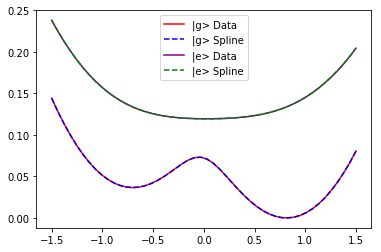

In [16]:
from scipy import interpolate
from scipy.interpolate import InterpolatedUnivariateSpline

### form spline for ground-state surface
Eg_spline = InterpolatedUnivariateSpline(rlist, E_ground, k=3)
Fg_spline = Eg_spline.derivative()

### form spline for excited-state surface
Ee_spline = InterpolatedUnivariateSpline(rlist, E_excite, k=3)
Fe_spline = Ee_spline.derivative()


#Eg_spline = interpolate.splrep(rlist, E_ground, s=0)
#Fg_spline = interpolate.splev(rlist, Eg_spline, der=1)

#print(Eg_spline)
plt.plot(rlist, E_ground, 'red', label='|g> Data')
plt.plot(rlist, Eg_spline(rlist), 'b--', label='|g> Spline')
plt.plot(rlist, E_excite, 'purple', label='|e> Data')
plt.plot(rlist, Ee_spline(rlist), 'g--', label='|e> Spline')
plt.legend()
plt.show()

In [17]:
def VelocityVerlet(spline, mass, r_curr, v_curr, dt):
    ### compute acceleration ... first we need force
    F_curr = -1*spline(r_curr)
    ### now get acceleration from a = F/m
    a_curr = F_curr / mass
    ### now get r in the future... r_fut
    r_fut = r_curr + v_curr*dt + 1/2 * a_curr*dt**2
    ### now get the future force: -d/dr E(r_fut)
    F_fut = -1*spline(r_fut)
    ### now that I have new Force, compute new acceleration
    a_fut = F_fut / mass
    ### now that I have acceleration in the future, let me calculate velocity 
    ### in the future
    v_fut = v_curr + 1/2 * (a_curr + a_fut)*dt
    ### return a list with new position and velocity
    return [r_fut, v_fut]

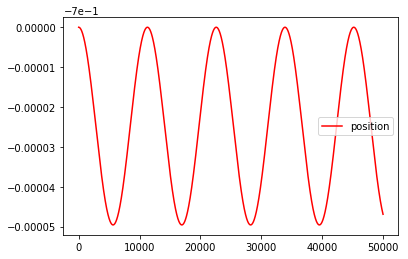

In [26]:
M = 1009883
ri = -0.7
vi = 0.
dt = 1.

time = np.zeros(50000)
v_of_t = np.zeros(50000)
r_of_t = np.zeros(50000)

for i in range(0,50000):
    time[i] = i*dt
    res = VelocityVerlet(Fg_spline, M, ri, vi, dt)
    ri = res[0]
    vi = res[1]
    r_of_t[i] = ri
    v_of_t[i] = vi

plt.plot(time, r_of_t, 'red', label='position')
plt.legend()
plt.show()